In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [5]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
# print(sklearn.tree.export_graphviz(dt_default, 
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = X.columns,
#                 class_names=['Disease', "No Disease"]))

In [12]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [13]:
# # If you're on windows:
# # Specifing path for dot file.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/bin/'

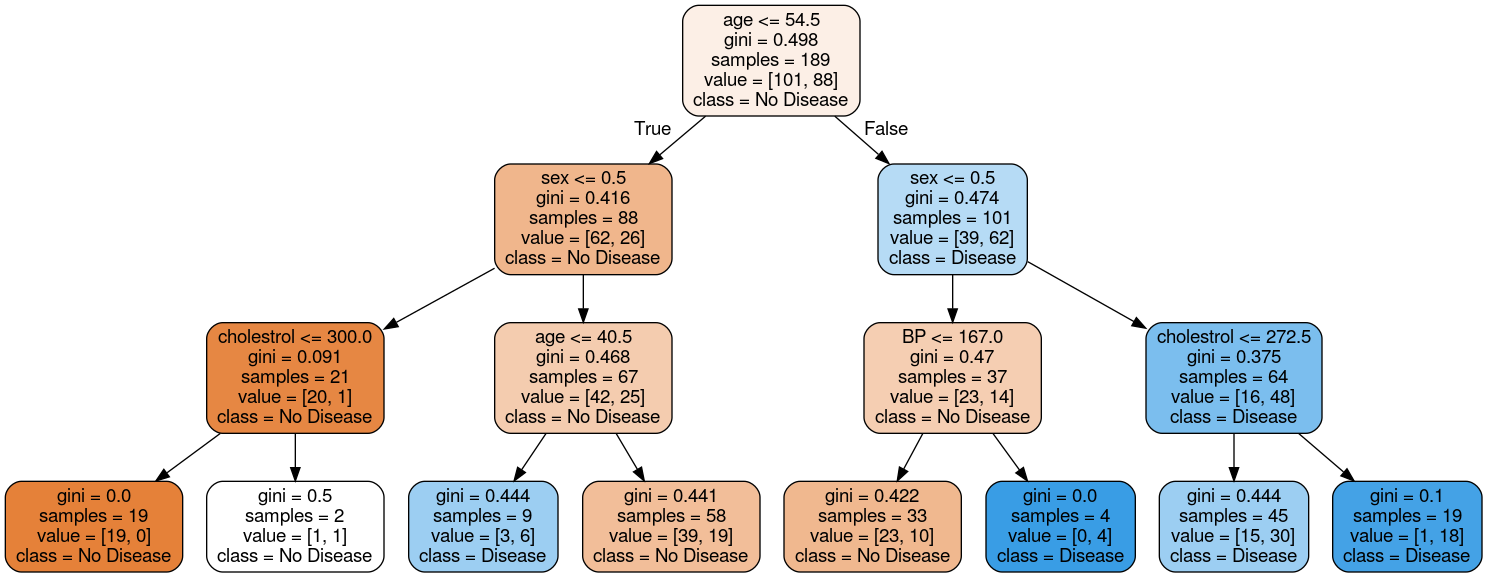

In [14]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

In [15]:
print(export_graphviz(dt, filled=True, rounded=True, special_characters=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"]))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<age &le; 54.5<br/>gini = 0.498<br/>samples = 189<br/>value = [101, 88]<br/>class = No Disease>, fillcolor="#fcefe6"] ;
1 [label=<sex &le; 0.5<br/>gini = 0.416<br/>samples = 88<br/>value = [62, 26]<br/>class = No Disease>, fillcolor="#f0b68c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<cholestrol &le; 300.0<br/>gini = 0.091<br/>samples = 21<br/>value = [20, 1]<br/>class = No Disease>, fillcolor="#e68743"] ;
1 -> 2 ;
3 [label=<gini = 0.0<br/>samples = 19<br/>value = [19, 0]<br/>class = No Disease>, fillcolor="#e58139"] ;
2 -> 3 ;
4 [label=<gini = 0.5<br/>samples = 2<br/>value = [1, 1]<br/>class = No Disease>, fillcolor="#ffffff"] ;
2 -> 4 ;
5 [label=<age &le; 40.5<br/>gini = 0.468<br/>samples = 67<br/>value = [42, 25]<br/>class = No Disease>, fillcolor="#f4ccaf"] ;
1 -> 5 ;
6 [label=<gini = 0.444<br/>samples = 9<br/>value = [3,

In [16]:
print(dot_data.getvalue())

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="age <= 54.5\ngini = 0.498\nsamples = 189\nvalue = [101, 88]\nclass = No Disease", fillcolor="#fcefe6"] ;
1 [label="sex <= 0.5\ngini = 0.416\nsamples = 88\nvalue = [62, 26]\nclass = No Disease", fillcolor="#f0b68c"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="cholestrol <= 300.0\ngini = 0.091\nsamples = 21\nvalue = [20, 1]\nclass = No Disease", fillcolor="#e68743"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No Disease", fillcolor="#e58139"] ;
2 -> 3 ;
4 [label="gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease", fillcolor="#ffffff"] ;
2 -> 4 ;
5 [label="age <= 40.5\ngini = 0.468\nsamples = 67\nvalue = [42, 25]\nclass = No Disease", fillcolor="#f4ccaf"] ;
1 -> 5 ;
6 [label="gini = 0.444\nsamples = 9\nvalue = [3, 6]\nclass = Disease", fillcolor="#9ccef2"] ;
5 -> 6 ;
7 [label="gini = 0.441\ns

#### Evaluating model performance

In [17]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [19]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]])

In [20]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]])